In [ ]:
# ELECTRIC VEHICLE POPULATION DATA ANALYSIS



Name: Aseeno
Organization: Entri Elevate
Date: 14-01-2025



1. Overview Of Problem Statement

In today's rapidly evolving transportation landscape, the adoption of electric vehicles (EVs) is crucial for mitigating climate change and
reducing reliance on fossil fuels. However, understanding the factors influencing EV adoption and predicting future trends is essential for
policymakers and stakeholders to effectively plan and implement strategies to accelerate EV adoption.
          This project aims to address this challenge by leveraging machine learning techniques to analyze a dataset of EV vehicle 
population data. The dataset includes various features such as vehicle type, year of manufacture, county, city, and possibly socio-economic
indicators for each location. By analyzing this data, we seek to identify key factors driving EV adoption and build predictive models to 
forecast future EV adoption trends in different regions.
           Such a solution holds significant importance for promoting sustainable transportation. It can help policymakers and stakeholders 
to effectively plan and implement strategies to accelerate EV adoption. This project aims to address this challenge by leveraging machine
learning techniques to analyze a dataset of EV vehicle population data. The dataset includes various features such as vehicle type, year of
manufacture, county, city, and possibly socio-economic indicators for each location. By analyzing this data, we seek to identify key factors 
driving EV adoption and build predictive models to forecast future EV adoption trends in different regions.
Such a solution holds significant importance for promoting sustainable transportation. It can help policymakers and urban planners 
understand the needs of EV drivers, optimize infrastructure planning (e.g., charging stations), and implement effective policies to encourage
EV adoption. This initiative aligns with the broader goal of transitioning to a cleaner and more sustainable transportation system.

Objective

To analyze the distribution and characteristics of electric vehicles across regions, manufacturers, and vehicle types. This includes:

Identifying popular EV models and manufacturers.
Understanding the geographic distribution of EVs.
Analyzing the impact of features like electric range and CAFV eligibility on adoption.


Data Description :
Dataset can be loaded from the link:https://drive.google.com/file/d/1XSEnDnmcUvDYBzpdpkGM9obpNNIQc8DS/view?usp=drive_link


FEATURES:

     1.VIN (1-10)
     2.County
     3.City
     4.State
     5.Postal Code
     6.Model Year
     7.Make
     8.Model
     9.Electric Vehicle Type
    10.Clean Alternative Fuel Vehicle (CAFV) Eligibility
    11.Electric Range
    12.Base MSRP
    13.Legislative District
    14.DOL Vehicle ID
    15.Vehicle Location
    16.Electric Utility
    17.2020 Census Tract

In [ ]:
# DATA COLLECTION

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
file_path = "Electric_Vehicle_Population_Data.csv"

In [4]:
data = pd.read_csv(file_path)

In [5]:
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA5L,King,Seattle,WA,98133.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,249903111,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5UX43EU08R,King,Seattle,WA,98125.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,46.0,264762606,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
2,5UX43EU06R,King,Seattle,WA,98102.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,43.0,275506031,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EA1J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,117023581,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,1G1RA6E43C,Thurston,Olympia,WA,98501.0,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,35.0,158415498,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220220,KNDC4DLC5N,Thurston,Olympia,WA,98501.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,202095862,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
220221,5YJ3E1EA5J,Snohomish,Bothell,WA,98012.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,288277657,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
220222,5YJ3E1EB0K,Snohomish,Bothell,WA,98012.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,44.0,478018719,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
220223,2C4RC1L72N,King,Redmond,WA,98053.0,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,45.0,216607737,POINT (-122.03287 47.68555),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [ ]:
# DATA PREPOCESSING

In [6]:
data.shape

(220225, 17)

In [7]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA5L,King,Seattle,WA,98133.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,249903111,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5UX43EU08R,King,Seattle,WA,98125.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,46.0,264762606,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
2,5UX43EU06R,King,Seattle,WA,98102.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,43.0,275506031,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EA1J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,117023581,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,1G1RA6E43C,Thurston,Olympia,WA,98501.0,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,35.0,158415498,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10


In [9]:
data.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
220220,KNDC4DLC5N,Thurston,Olympia,WA,98501.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,202095862,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
220221,5YJ3E1EA5J,Snohomish,Bothell,WA,98012.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,288277657,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
220222,5YJ3E1EB0K,Snohomish,Bothell,WA,98012.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,44.0,478018719,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
220223,2C4RC1L72N,King,Redmond,WA,98053.0,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,45.0,216607737,POINT (-122.03287 47.68555),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
220224,5YJ3E1EA6J,King,Bellevue,WA,98007.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,41.0,302385982,POINT (-122.12053 47.61334),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [10]:
# datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220225 entries, 0 to 220224
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         220225 non-null  object 
 1   County                                             220222 non-null  object 
 2   City                                               220222 non-null  object 
 3   State                                              220225 non-null  object 
 4   Postal Code                                        220222 non-null  float64
 5   Model Year                                         220225 non-null  int64  
 6   Make                                               220225 non-null  object 
 7   Model                                              220225 non-null  object 
 8   Electric Vehicle Type                              220225 non-null  object

In [ ]:
#OBSERVATION:
       'Here we have droped the unwanted columns'.
 ie, they are not contributing for modelling.

In [11]:
# To delete unwanted columns
data.drop(columns=['State','Postal Code','Base MSRP','VIN (1-10)','Vehicle Location','2020 Census Tract'
                  ],axis = 1,inplace = True)

In [ ]:
#HANDLING MISSING VALUES:
        Here we Handle Missing Values by Mean, Median and Mode.

In [12]:
# missing values check
data.isnull().sum()/len(data)*100

County                                               0.001362
City                                                 0.001362
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Legislative District                                 0.210240
DOL Vehicle ID                                       0.000000
Electric Utility                                     0.001362
dtype: float64

In [13]:
# Fill missing values in numerical columns with mean
data['Legislative District'] = data['Legislative District'].fillna(data['Legislative District'].mean())

In [14]:
# Fill missing values in categorical columns with mode
data['County'] = data['County'].fillna(data['County'].mode()[0])
data['City'] = data['City'].fillna(data['City'].mode()[0])
data['Electric Utility'] = data['Electric Utility'].fillna(data['Electric Utility'].mode()[0])

In [15]:
# missing values check
data.isnull().sum()/len(data)*100

County                                               0.0
City                                                 0.0
Model Year                                           0.0
Make                                                 0.0
Model                                                0.0
Electric Vehicle Type                                0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Range                                       0.0
Legislative District                                 0.0
DOL Vehicle ID                                       0.0
Electric Utility                                     0.0
dtype: float64

In [ ]:
#HANDLING DUPLICATES

In [16]:
# check for duplicated rows
data.duplicated().sum()

np.int64(0)

In [ ]:
 #  'There is no Duplicates'.

In [17]:
# unique values in each columns/features
data.nunique()

County                                                  208
City                                                    783
Model Year                                               21
Make                                                     46
Model                                                   159
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          109
Legislative District                                     50
DOL Vehicle ID                                       220225
Electric Utility                                         75
dtype: int64

In [18]:
data['Electric Range'].value_counts()

Electric Range
0      127319
215      6335
32       5162
25       4524
21       4378
        ...  
51          4
288         4
95          3
57          2
74          2
Name: count, Length: 109, dtype: int64

In [19]:
data['City'].value_counts()

City
Seattle        35210
Bellevue       10869
Vancouver       7935
Redmond         7727
Bothell         7176
               ...  
Santa Clara        1
Norfolk            1
Santa Rosa         1
Raeford            1
Atherton           1
Name: count, Length: 783, dtype: int64

In [20]:
data['Model Year'].value_counts()

Model Year
2023    59820
2024    43176
2022    28661
2021    20224
2018    14247
2020    12280
2019    10853
2017     8314
2016     5441
2015     4700
2013     4257
2014     3444
2025     2519
2012     1534
2011      696
2010       24
2008       23
2000        7
2002        2
1999        2
2003        1
Name: count, dtype: int64

In [21]:
data['Make'].value_counts()

Make
TESLA                     95378
CHEVROLET                 16100
NISSAN                    15155
FORD                      11629
KIA                       10403
BMW                        8998
TOYOTA                     8736
HYUNDAI                    6572
RIVIAN                     6156
VOLKSWAGEN                 5810
JEEP                       5666
VOLVO                      5401
AUDI                       4104
CHRYSLER                   3725
MERCEDES-BENZ              2135
SUBARU                     1736
HONDA                      1672
PORSCHE                    1357
POLESTAR                   1201
MINI                       1068
MITSUBISHI                 1042
CADILLAC                    965
MAZDA                       851
LEXUS                       835
DODGE                       709
FIAT                        600
LUCID                       330
LINCOLN                     326
GENESIS                     307
GMC                         263
SMART                       244
JAG

In [22]:
data['Model'].value_counts()

Model
MODEL Y        45793
MODEL 3        34466
LEAF           13746
MODEL S         7827
BOLT EV         6939
               ...  
745LE              2
REVUELTO           2
918                1
FLYING SPUR        1
G-CLASS            1
Name: count, Length: 159, dtype: int64

In [23]:
# statistical analysis
data.describe()

,Model Year,Electric Range,Legislative District,DOL Vehicle ID
count,220225.000000,220225.000000,220225.000000,2.202250e+05
mean,2021.194242,48.724423,28.907909,2.315541e+08
std,2.981490,85.874160,14.895703,6.983360e+07
min,1999.000000,0.000000,1.000000,4.385000e+03
25%,2020.000000,0.000000,17.000000,1.980609e+08
50%,2022.000000,0.000000,32.000000,2.448443e+08
75%,2023.000000,42.000000,42.000000,2.659792e+08
max,2025.000000,337.000000,49.000000,4.792548e+08


In [ ]:
#HANDLING SKEWNESS

In [24]:
# To check the skewness
data.select_dtypes(include=["number"]).skew()

Model Year             -1.264893
Electric Range          1.761613
Legislative District   -0.431746
DOL Vehicle ID          0.155472
dtype: float64

In [25]:
data.select_dtypes(include=["number"]).skew().sort_values(ascending= True)

Model Year             -1.264893
Legislative District   -0.431746
DOL Vehicle ID          0.155472
Electric Range          1.761613
dtype: float64

In [ ]:
  #    By checking skewness we identifies the feature' Model Year' and 'Electric Range' had Skewnes.
   # We handled them by using log and exponential transformation.

In [26]:
#Log Transformation
data['Electric Range']= np.log1p(data['Electric Range'])

In [27]:
# To check the skewness
data.select_dtypes(include=["number"]).skew()

Model Year             -1.264893
Electric Range          0.569414
Legislative District   -0.431746
DOL Vehicle ID          0.155472
dtype: float64

In [28]:
data['Model Year']= np.log1p(data['Model Year'])

In [29]:
# To check the skewness
data.select_dtypes(include=["number"]).skew()

Model Year             -1.267961
Electric Range          0.569414
Legislative District   -0.431746
DOL Vehicle ID          0.155472
dtype: float64

In [30]:
#Square Root Transformation
data['Model Year']= np.sqrt(data['Model Year'])

In [31]:
# To check the skewness
data.select_dtypes(include=["number"]).skew()

Model Year             -1.268162
Electric Range          0.569414
Legislative District   -0.431746
DOL Vehicle ID          0.155472
dtype: float64

In [32]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data['Model Year']= scaler.fit_transform(data[['Model Year']])

In [33]:
# To check the skewness
data.select_dtypes(include=["number"]).skew()

Model Year             -1.268162
Electric Range          0.569414
Legislative District   -0.431746
DOL Vehicle ID          0.155472
dtype: float64

In [34]:
#Exponential Transformation
data['Model Year']= np.exp(data['Model Year'])

In [35]:
data.select_dtypes(include=["number"]).skew()

Model Year              0.072775
Electric Range          0.569414
Legislative District   -0.431746
DOL Vehicle ID          0.155472
dtype: float64

In [ ]:
# SELECTING NUMERICAL FEATURES

In [36]:
num_data = data.select_dtypes(include="number")
num_data

,Model Year,Electric Range,Legislative District,DOL Vehicle ID
0,0.670659,5.587249,46.0,249903111
1,2.560531,3.688879,46.0,264762606
2,2.560531,3.688879,43.0,275506031
3,0.342868,5.375278,1.0,117023581
4,0.045620,3.583519,35.0,158415498
...,...,...,...,...
220220,1.310899,0.000000,22.0,202095862
220221,0.342868,5.375278,1.0,288277657
220222,0.479571,5.398163,44.0,478018719
220223,1.310899,3.496508,45.0,216607737


In [37]:
numeric_columns=list(num_data)
numeric_columns

['Model Year', 'Electric Range', 'Legislative District', 'DOL Vehicle ID']

In [38]:
num_data.isnull().sum()/len(num_data)*100

Model Year              0.0
Electric Range          0.0
Legislative District    0.0
DOL Vehicle ID          0.0
dtype: float64

In [39]:
num_data.skew()

Model Year              0.072775
Electric Range          0.569414
Legislative District   -0.431746
DOL Vehicle ID          0.155472
dtype: float64

In [ ]:
# SELECTING CATEGORICAL FEATURES

In [40]:
cat_data = data.select_dtypes(include="object")
cat_data

,County,City,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,King,Seattle,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Seattle,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
2,King,Seattle,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,King,Kirkland,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...
220220,Thurston,Olympia,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUGET SOUND ENERGY INC
220221,Snohomish,Bothell,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
220222,Snohomish,Bothell,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
220223,King,Redmond,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [41]:
categorical_columns=list(cat_data)
categorical_columns

['County',
 'City',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Utility']

In [42]:
cat_data.isnull().sum()

County                                               0
City                                                 0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Utility                                     0
dtype: int64

In [ ]:
# CHECKING OUTLIERS

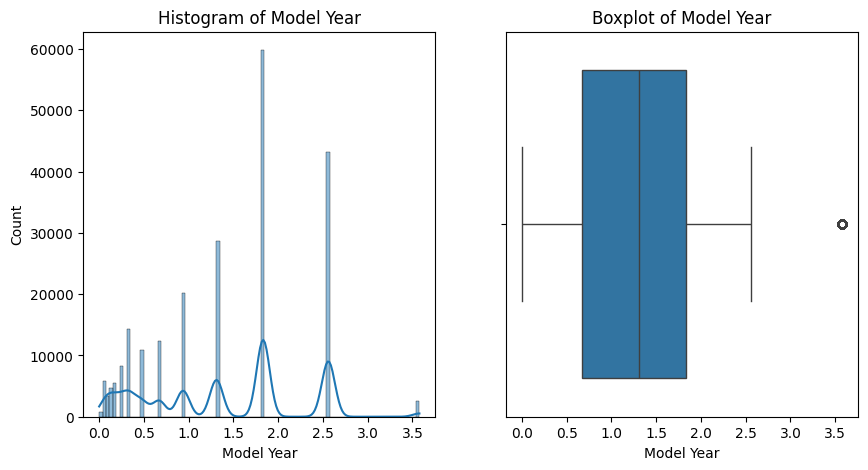

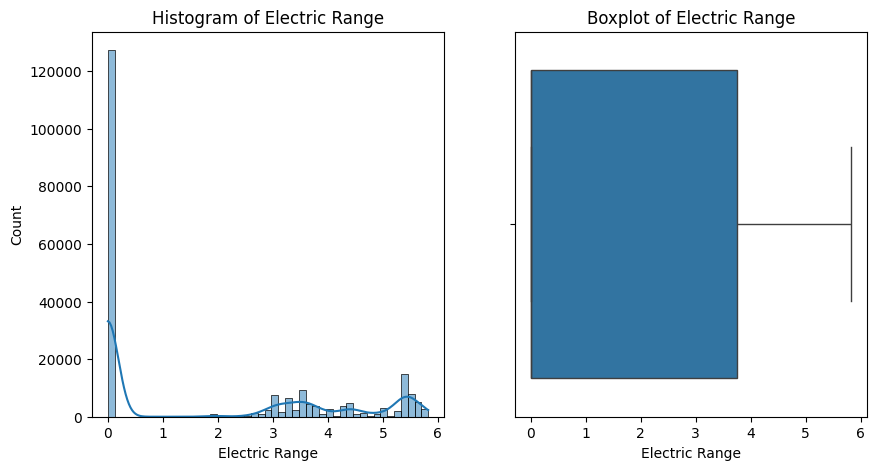

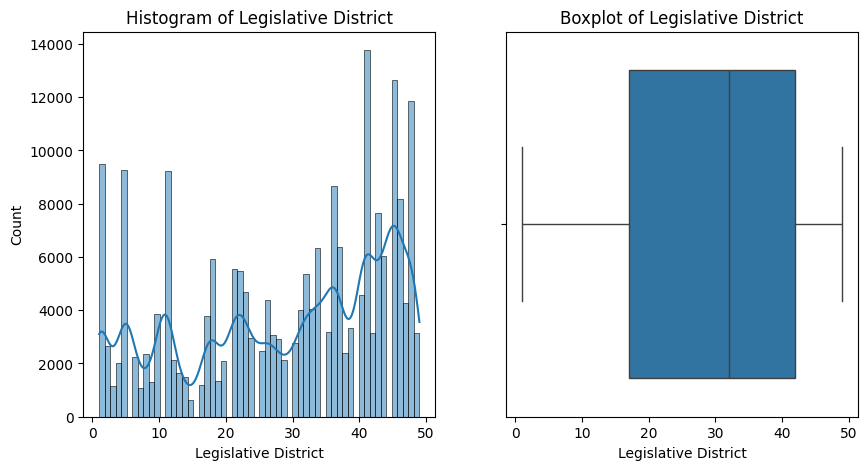

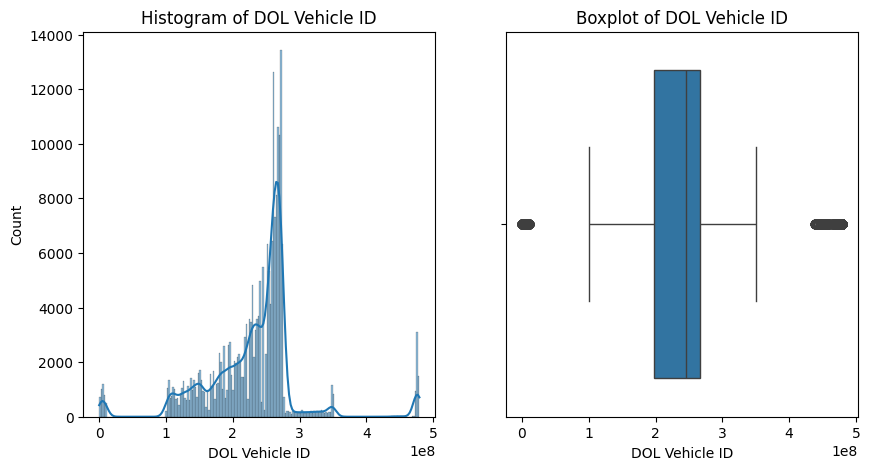

In [43]:
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    
  # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

In [44]:
data.describe()

,Model Year,Electric Range,Legislative District,DOL Vehicle ID
count,220225.000000,220225.000000,220225.000000,2.202250e+05
mean,1.399866,1.814173,28.907909,2.315541e+08
std,0.857959,2.224082,14.895703,6.983360e+07
min,0.000564,0.000000,1.000000,4.385000e+03
25%,0.670659,0.000000,17.000000,1.980609e+08
50%,1.310899,0.000000,32.000000,2.448443e+08
75%,1.832264,3.761200,42.000000,2.659792e+08
max,3.577633,5.823046,49.000000,4.792548e+08


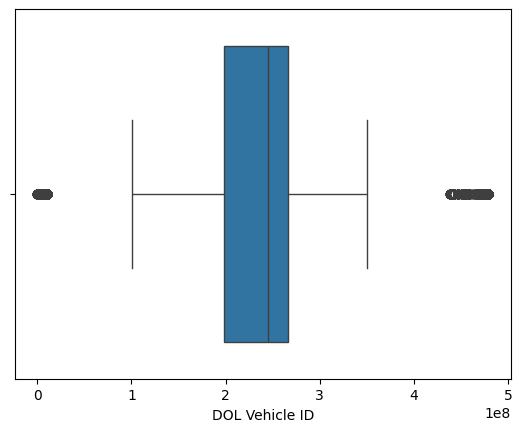

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x= 'DOL Vehicle ID', data=data)
plt.show()

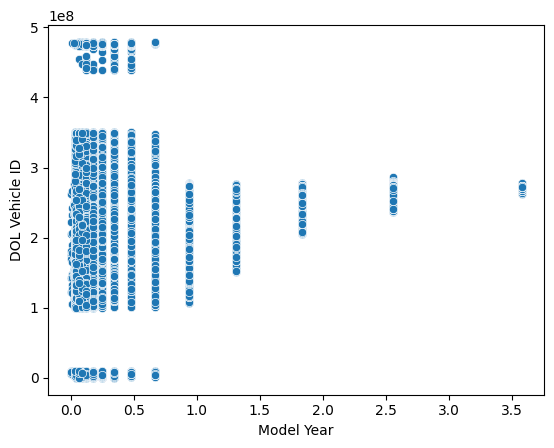

In [46]:
sns.scatterplot(x='Model Year', y='DOL Vehicle ID', data=data)
plt.show()

In [47]:
#Calculate IQR
Q1 = data['DOL Vehicle ID'].quantile(0.25)
Q3 = data['DOL Vehicle ID'].quantile(0.75)
IQR = Q3 - Q1 

#Define outlier threshold (more lenient than the standard 1.5*IQR)
threshold = Q3 + 2 * IQR

#Filter out potential outliers
data_filtered = data[data['DOL Vehicle ID'] < threshold]


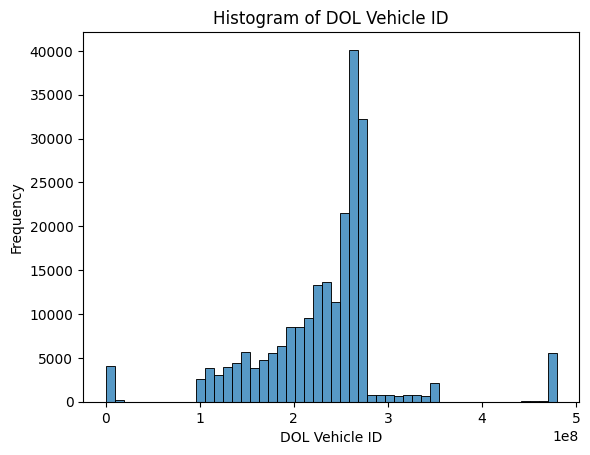

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['DOL Vehicle ID'],bins=50)
plt.xlabel("DOL Vehicle ID")
plt.ylabel("Frequency")
plt.title("Histogram of DOL Vehicle ID")
plt.show()


In [49]:
data['DOL Vehicle ID_Log'] =np.log10(data['DOL Vehicle ID'])

In [50]:
bins = [0, 1e7, 2e7, 3e7, 4e7, 5e7, np.inf]  # Adjust bin edges as needed
labels = ['0-10M', '10M-20M', '20M-30M', '30M-40M', '40M-50M', '50M+']
data['DOL_Vehicle_ID_Bin'] = pd.cut(data['DOL Vehicle ID'], bins=bins, labels=labels)

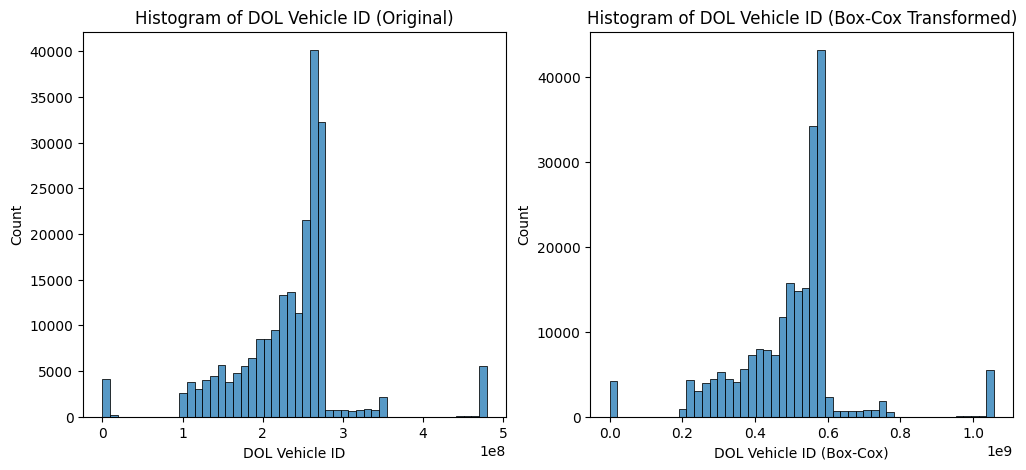

Optimal lambda value: 1.041649563559918


In [51]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Box-Cox transformation
data['DOL Vehicle ID_BoxCox'], lambda_ = boxcox(data['DOL Vehicle ID']) 

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data['DOL Vehicle ID'], bins=50, ax=axs[0])
axs[0].set_title('Histogram of DOL Vehicle ID (Original)')
axs[0].set_xlabel('DOL Vehicle ID')

sns.histplot(data['DOL Vehicle ID_BoxCox'], bins=50, ax=axs[1])
axs[1].set_title('Histogram of DOL Vehicle ID (Box-Cox Transformed)')
axs[1].set_xlabel('DOL Vehicle ID (Box-Cox)')

plt.show()

print(f"Optimal lambda value: {lambda_}")


In [52]:
import pandas as pd
from sklearn.preprocessing import RobustScaler


data = {'DOL_Vehicle_ID': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500]}
df = pd.DataFrame(data)

# Create a RobustScaler object
scaler = RobustScaler()

# Fit and transform the data
df['DOL_Vehicle_ID_scaled'] = scaler.fit_transform(df[['DOL_Vehicle_ID']])

print(df)

    DOL_Vehicle_ID  DOL_Vehicle_ID_scaled
0                1              -0.199313
1                2              -0.192440
2                3              -0.185567
3                4              -0.178694
4                5              -0.171821
5               10              -0.137457
6               20              -0.068729
7               30               0.000000
8               40               0.068729
9               50               0.137457
10             100               0.481100
11             200               1.168385
12             300               1.855670
13             400               2.542955
14             500               3.230241


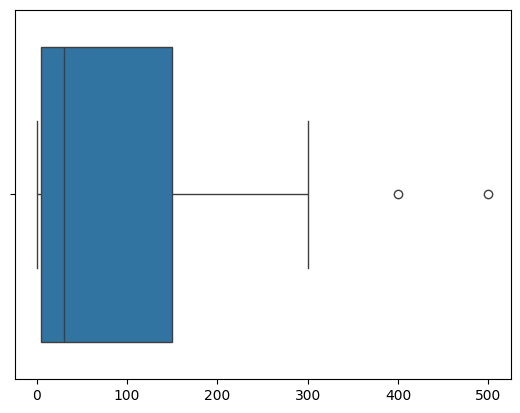

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500]

# Create a boxplot
sns.boxplot(x=data)
plt.show()

In [54]:
import numpy as np


data = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500]

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Calculate Z-scores
z_scores = [(x - mean) / std_dev for x in data]

# Identify outliers
outliers = [x for x, z in zip(data, z_scores) if abs(z) > 3]

print("Outliers:", outliers)

Outliers: []


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display inline
%matplotlib inline


In [ ]:
# EXPLORATORY DATA ANALYSIS

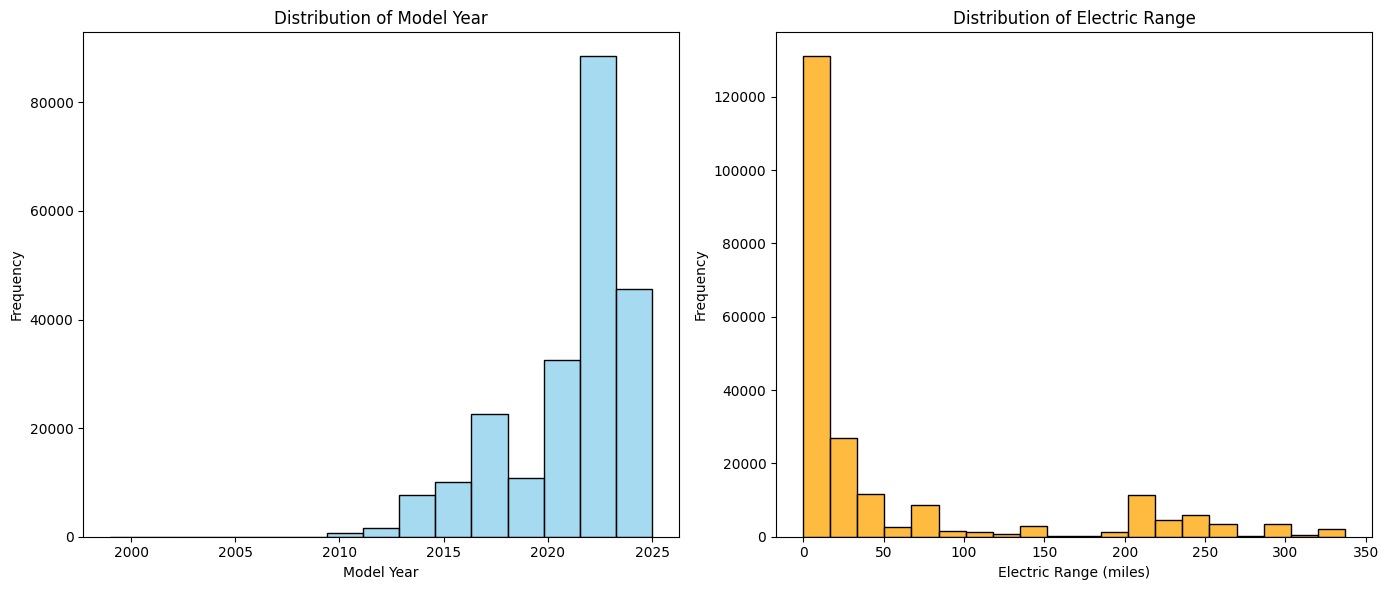

In [58]:
# Histogram for Model Year and Electric Range
plt.figure(figsize=(14, 6))

# Histogram for Model Year
plt.subplot(1, 2, 1)
sns.histplot(data['Model Year'], kde=False, bins=15, color='skyblue')
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')

# Histogram for Electric Range
plt.subplot(1, 2, 2)
sns.histplot(data['Electric Range'], kde=False, bins=20, color='orange')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


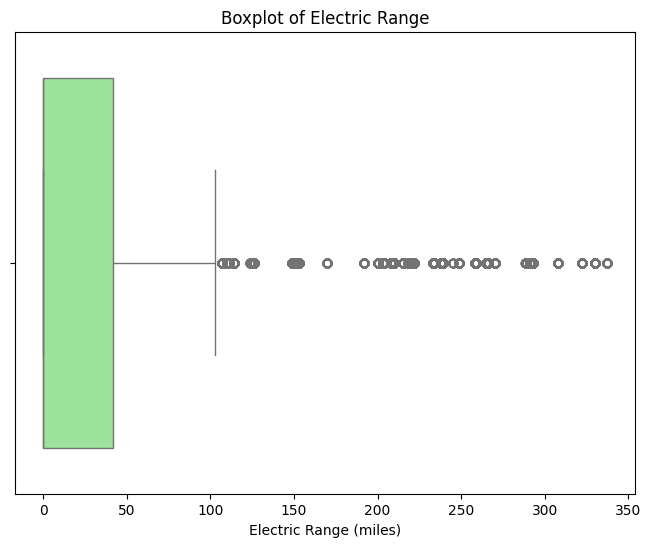

In [59]:
# Boxplot for Electric Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='Electric Range', data=data, color='lightgreen')
plt.title('Boxplot of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.show()


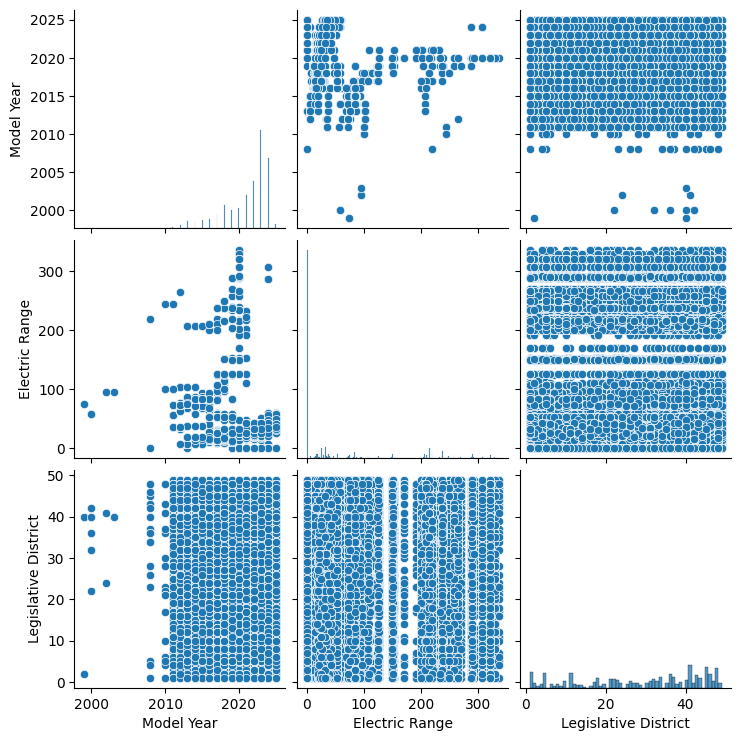

In [60]:
# Pair plot for numerical columns
sns.pairplot(data[['Model Year', 'Electric Range', 'Legislative District']])
plt.show()


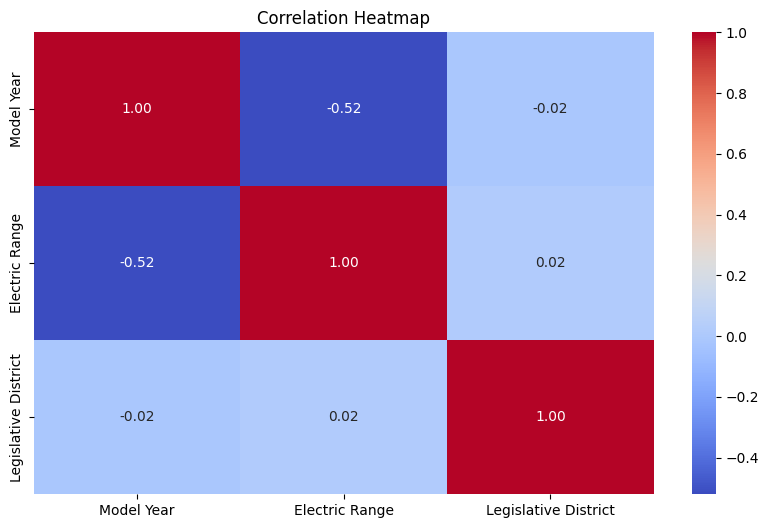

In [61]:
# Heatmap for numerical correlation
plt.figure(figsize=(10, 6))
correlation = data[['Model Year', 'Electric Range', 'Legislative District']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


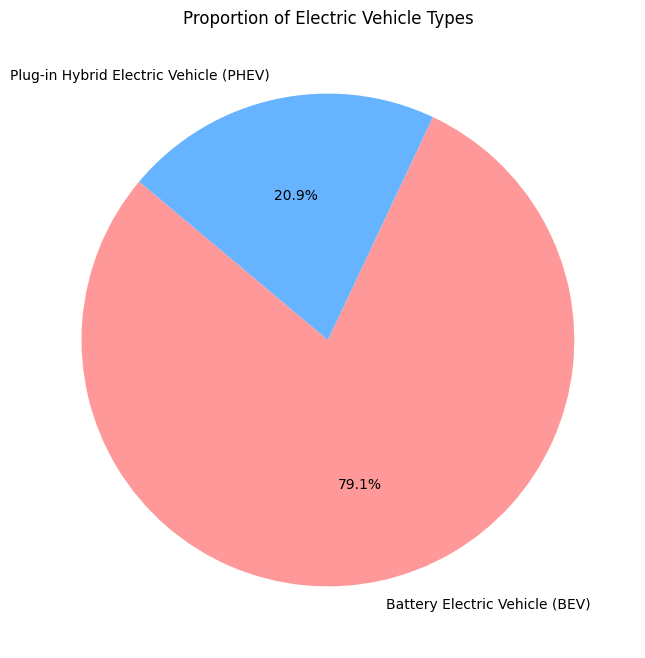

In [62]:
# Pie chart for Electric Vehicle Type
ev_type_counts = data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Electric Vehicle Types')
plt.show()


C:\Users\shamir\AppData\Local\Temp\ipykernel_2764\2250504590.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')


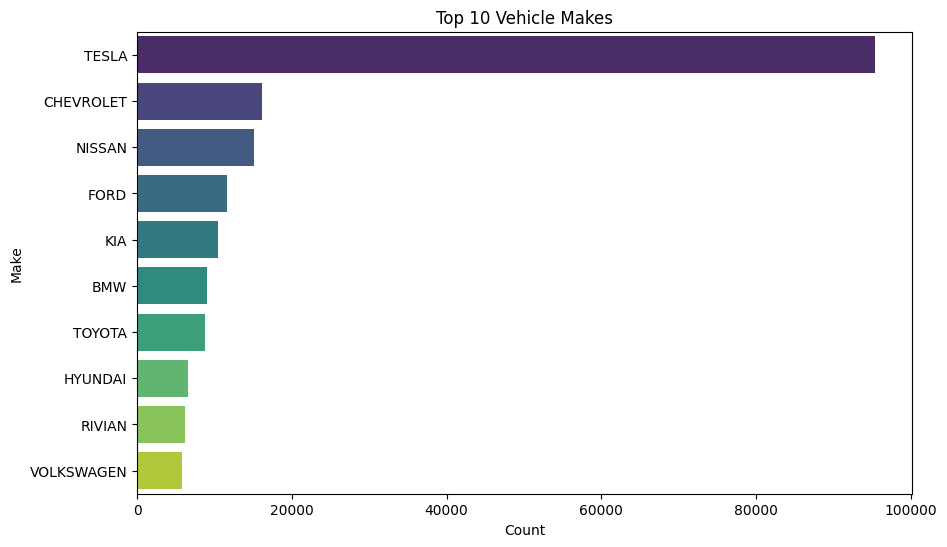

In [63]:
# Bar plot for top 10 Makes
top_makes = data['Make'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')
plt.title('Top 10 Vehicle Makes')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()


C:\Users\shamir\AppData\Local\Temp\ipykernel_2764\1835792569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['County'].isin(top_counties)], y='County', order=top_counties, palette='coolwarm')


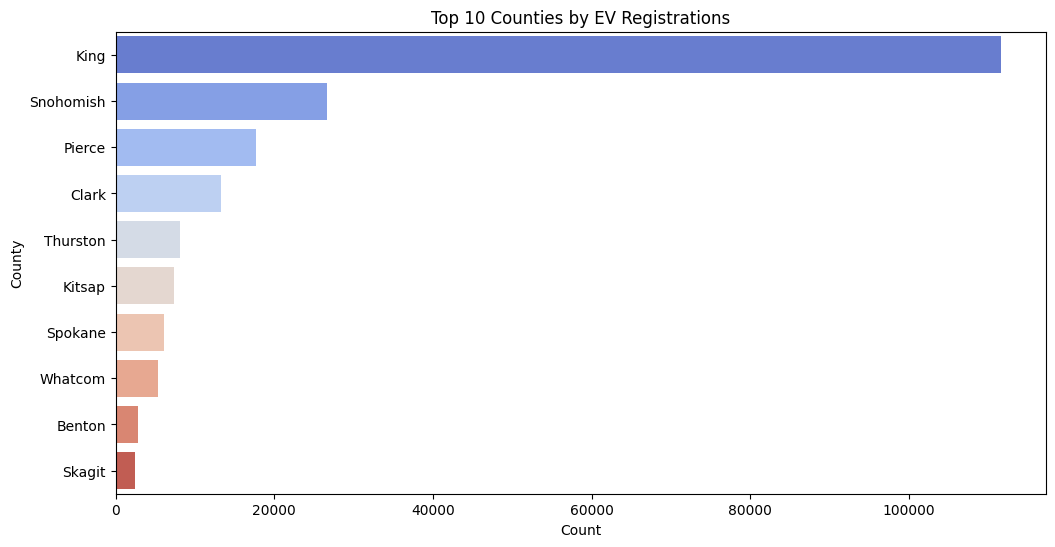

In [64]:
# Count plot for top 10 Counties
top_counties = data['County'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=data[data['County'].isin(top_counties)], y='County', order=top_counties, palette='coolwarm')
plt.title('Top 10 Counties by EV Registrations')
plt.xlabel('Count')
plt.ylabel('County')
plt.show()


C:\Users\shamir\AppData\Local\Temp\ipykernel_2764\3226244771.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Model Year', y='Electric Range', ci=None)


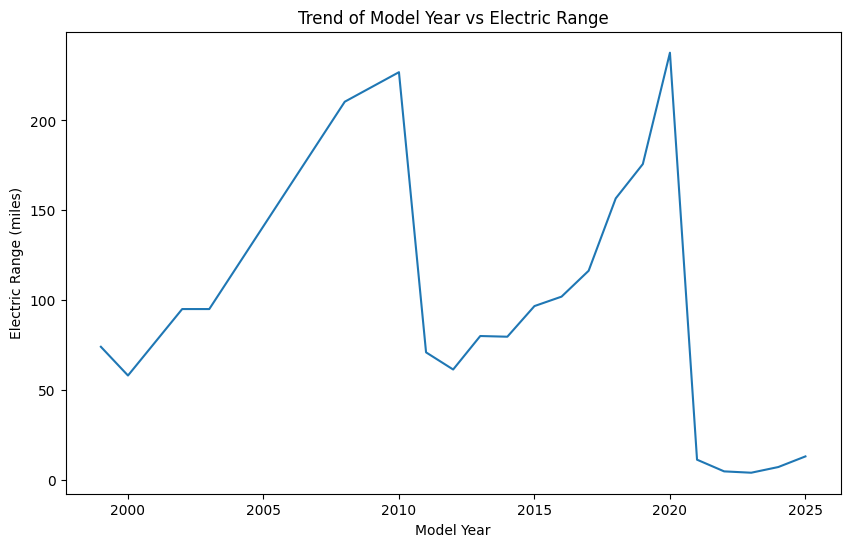

In [65]:
# Line plot for Model Year vs Electric Range
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Model Year', y='Electric Range', ci=None)
plt.title('Trend of Model Year vs Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.show()


C:\Users\shamir\AppData\Local\Temp\ipykernel_2764\401706049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Electric Range'], shade=True, color='purple')


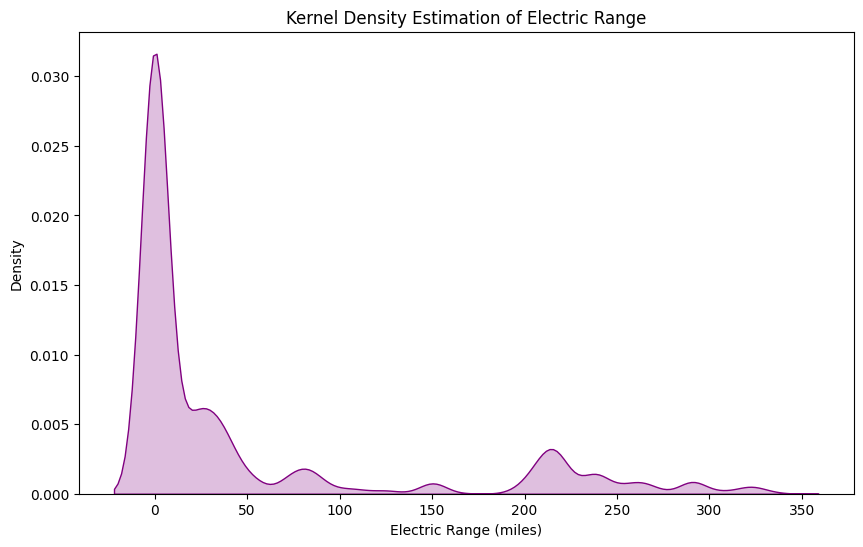

In [66]:
# KDE plot for Electric Range
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Electric Range'], shade=True, color='purple')
plt.title('Kernel Density Estimation of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.show()


In [ ]:
# FEATURE ENGINEERING

In [67]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [68]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_columns)


Categorical Features: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


In [69]:
# Apply Label Encoding to categorical features
label_encoder = LabelEncoder()

for col in categorical_columns:
    data[col + '_label_encoded'] = label_encoder.fit_transform(data[col])

# View sample encoded columns
data[[col for col in data.columns if '_label_encoded' in col]].head()


,VIN (1-10)_label_encoded,County_label_encoded,City_label_encoded,State_label_encoded,Make_label_encoded,Model_label_encoded,Electric Vehicle Type_label_encoded,Clean Alternative Fuel Vehicle (CAFV) Eligibility_label_encoded,Vehicle Location_label_encoded,Electric Utility_label_encoded
0,3941,89,624,45,39,90,0,0,473,56
1,3787,89,624,45,5,152,1,0,442,56
2,3783,89,624,45,5,152,1,0,458,56
3,3903,89,336,45,39,90,0,0,409,73
4,992,188,492,45,8,148,1,0,628,72


In [72]:
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding with sparse output
one_hot_encoder = OneHotEncoder(sparse_output=True, drop='first')

# Fit and transform column by column
for col in categorical_columns:
    encoded_data = one_hot_encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=one_hot_encoder.get_feature_names_out([col]))
    data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    data.drop(columns=[col], inplace=True)  # Drop the original column to save memory

# View the updated dataset
data.head()



,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,VIN (1-10)_label_encoded,County_label_encoded,City_label_encoded,...,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,Electric Utility_nan
0,98133.0,2020,266,0,46.0,249903111,5.303300e+10,3941,89,624,...,0,0,0,0,0,0,0,0,0,0
1,98125.0,2024,39,0,46.0,264762606,5.303300e+10,3787,89,624,...,0,0,0,0,0,0,0,0,0,0
2,98102.0,2024,39,0,43.0,275506031,5.303301e+10,3783,89,624,...,0,0,0,0,0,0,0,0,0,0
3,98034.0,2018,215,0,1.0,117023581,5.303302e+10,3903,89,336,...,0,0,0,0,0,0,0,1.0,0,0
4,98501.0,2012,35,0,35.0,158415498,5.306701e+10,992,188,492,...,0,0,0,0,0,0,1.0,0,0,0


In [76]:
# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

# List the columns in the dataset
print(f"Columns: {data.columns.tolist()}")

Dataset shape: (220225, 15159)
Columns: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract', 'VIN (1-10)_label_encoded', 'County_label_encoded', 'City_label_encoded', 'State_label_encoded', 'Make_label_encoded', 'Model_label_encoded', 'Electric Vehicle Type_label_encoded', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility_label_encoded', 'Vehicle Location_label_encoded', 'Electric Utility_label_encoded', 'VIN (1-10)_1C4JJXN61P', 'VIN (1-10)_1C4JJXN62P', 'VIN (1-10)_1C4JJXN63P', 'VIN (1-10)_1C4JJXN64P', 'VIN (1-10)_1C4JJXN65P', 'VIN (1-10)_1C4JJXN66P', 'VIN (1-10)_1C4JJXN67P', 'VIN (1-10)_1C4JJXN68P', 'VIN (1-10)_1C4JJXN69P', 'VIN (1-10)_1C4JJXN6XP', 'VIN (1-10)_1C4JJXP60M', 'VIN (1-10)_1C4JJXP60N', 'VIN (1-10)_1C4JJXP60P', 'VIN (1-10)_1C4JJXP61M', 'VIN (1-10)_1C4JJXP61N', 'VIN (1-10)_1C4JJXP61P', 'VIN (1-10)_1C4JJXP62M', 'VIN (1-10)_1C4JJXP62N', 'VIN (1-10)_1C4JJXP62P', 'VIN (1-10)_1C4JJXP63M', 'VIN (1-10)_1C4JJXP6

In [83]:
from sklearn.model_selection import train_test_split


X = data.drop('Electric Vehicle Type_label_encoded', axis=1)  
y = data['Electric Vehicle Type_label_encoded']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (176180, 15158)
Testing data shape: (44045, 15158)


In [ ]:
# FEATURE SELECTION

In [84]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split


In [86]:
# Define features (X) and target (y)
X = data.drop('Electric Vehicle Type_label_encoded', axis=1)  
y = data['Electric Vehicle Type_label_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (176180, 15158)
X_test shape: (44045, 15158)


In [88]:
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test


In [89]:
random_forest = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)


In [92]:
X_train_small = X_train[:1000]
y_train_small = y_train[:1000]


In [99]:
print (data.columns)

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract',
       'VIN (1-10)_label_encoded', 'County_label_encoded',
       'City_label_encoded',
       ...
       'Electric Utility_PUD NO 1 OF CHELAN COUNTY',
       'Electric Utility_PUD NO 1 OF DOUGLAS COUNTY',
       'Electric Utility_PUD NO 1 OF OKANOGAN COUNTY',
       'Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY',
       'Electric Utility_PUD NO 1 OF WHATCOM COUNTY',
       'Electric Utility_PUD NO 2 OF GRANT COUNTY',
       'Electric Utility_PUGET SOUND ENERGY INC',
       'Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'Electric Utility_nan'],
      dtype='object', length=15159)


In [104]:
# To delete unwanted columns
data.drop(columns=['Postal Code','Base MSRP'],axis = 1,inplace = True)

In [106]:
print (data.columns)

Index(['Model Year', 'Electric Range', 'Legislative District',
       'DOL Vehicle ID', '2020 Census Tract', 'VIN (1-10)_label_encoded',
       'County_label_encoded', 'City_label_encoded', 'State_label_encoded',
       'Make_label_encoded',
       ...
       'Electric Utility_PUD NO 1 OF CHELAN COUNTY',
       'Electric Utility_PUD NO 1 OF DOUGLAS COUNTY',
       'Electric Utility_PUD NO 1 OF OKANOGAN COUNTY',
       'Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY',
       'Electric Utility_PUD NO 1 OF WHATCOM COUNTY',
       'Electric Utility_PUD NO 2 OF GRANT COUNTY',
       'Electric Utility_PUGET SOUND ENERGY INC',
       'Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'Electric Utility_nan'],
      dtype='object', length=15157)


In [107]:
# To delete unwanted columns
data.drop(columns=['2020 Census Tract','VIN (1-10)_label_encoded'],axis = 1,inplace = True)

In [111]:
print (data.columns)

Index(['Model Year', 'Electric Range', 'Legislative District',
       'DOL Vehicle ID', 'County_label_encoded', 'City_label_encoded',
       'State_label_encoded', 'Make_label_encoded', 'Model_label_encoded',
       'Electric Vehicle Type_label_encoded',
       ...
       'Electric Utility_PUD NO 1 OF CHELAN COUNTY',
       'Electric Utility_PUD NO 1 OF DOUGLAS COUNTY',
       'Electric Utility_PUD NO 1 OF OKANOGAN COUNTY',
       'Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY',
       'Electric Utility_PUD NO 1 OF WHATCOM COUNTY',
       'Electric Utility_PUD NO 2 OF GRANT COUNTY',
       'Electric Utility_PUGET SOUND ENERGY INC',
       'Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'Electric Utility_nan'],
      dtype='object', length=15155)


In [114]:
# Keep only the top 10000 rows
data = data.head(10000)

# Split data
X = data.drop('Electric Vehicle Type_label_encoded', axis=1)
y = data['Electric Vehicle Type_label_encoded']


In [117]:
# Use only the first 1000 rows for training
X_train_sample = X_train.iloc[:1000]
y_train_sample = y_train.iloc[:1000]

decision_tree.fit(X_train_sample, y_train_sample)


C:\Users\shamir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


DecisionTreeClassifier(max_depth=10, random_state=42)